<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/DaraVisulization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = "/content/drive/MyDrive/datamining/BostonHousing.csv"

housing_df = pd.read_csv(file_path)
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [3]:
housing_df = housing_df.rename(columns ={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


## Load the Matrak Dataset


In [4]:
file_path = "/content/drive/MyDrive/datamining/Amtrak.csv"
amtrak_df = pd.read_csv(file_path)

amtrak_df.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [5]:
amtrak_df['Date'] = pd.to_datetime(amtrak_df['Month'], format ='%d/%m/%Y')
amtrak_df.head()


,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01


In [6]:
amtrak_df.dtypes

Month                object
Ridership           float64
Date         datetime64[ns]
dtype: object

## Basic Plots: Line Plots, Bar Chart, Scatter Plot

### Matplot lib version

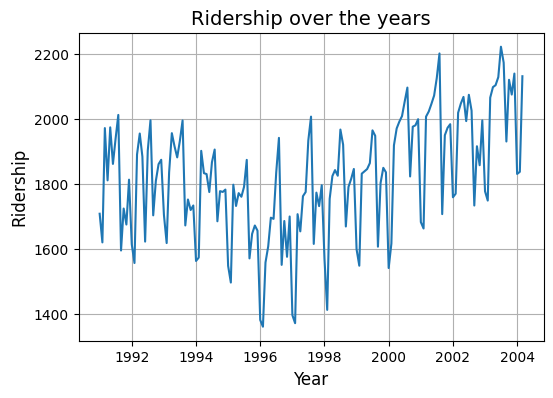

In [7]:
import matplotlib.pyplot as plt
plt.subplots(figsize =(6,4))
#Line Plot for ridership over the years
plt.plot(amtrak_df['Date'], amtrak_df['Ridership'], color = 'C0')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ridership', fontsize = 12)
plt.title('Ridership over the years', fontsize = 14)
plt.grid(True)
plt.show()

### Scatter Plot for Housing Data showing relationship between LSTAT and MEDV

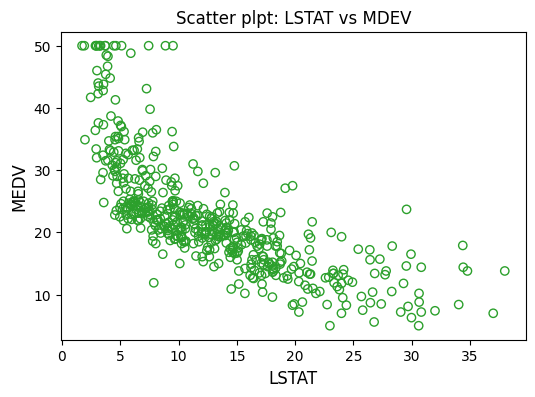

In [8]:
plt.subplots(figsize  =(6,4))
plt.scatter(housing_df['LSTAT'], housing_df ['MEDV'], color = 'C2', facecolor ='none')
plt.xlabel('LSTAT', fontsize= 12)
plt.ylabel('MEDV', fontsize = 12)
plt.title('Scatter plpt: LSTAT vs MDEV')
plt.show()

### Bar Chart showing mean MEDV for each category fo CHAS


#### using Matplotlib

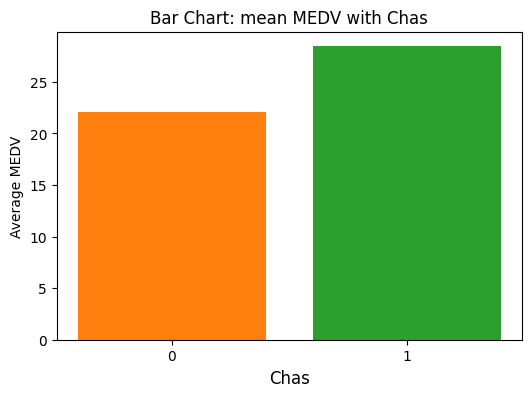

In [9]:
mean_medv_per_chas = housing_df.groupby('CHAS'). mean().MEDV
plt.subplots(figsize =(6, 4))
plt.bar(mean_medv_per_chas.index, mean_medv_per_chas, color = ['C1','C2'])
plt.xticks([0,1], label = ['0', '1'])
plt.xlabel ('Chas', fontsize=12)
plt.ylabel ('Average MEDV')
plt.title ('Bar Chart: mean MEDV with Chas')
plt.show()

#### Bar plot using seaborn


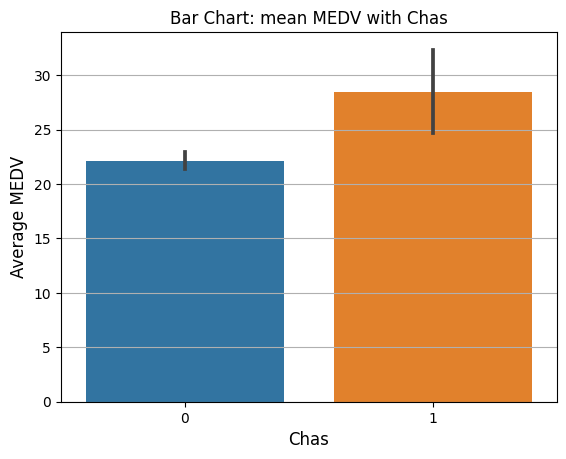

In [10]:
import seaborn as sns
import numpy as np
sns.barplot(x= 'CHAS', y = 'MEDV', data= housing_df, estimator = np.mean)
plt.xlabel ('Chas', fontsize=12)
plt.ylabel ('Average MEDV', fontsize=12)
plt.title ('Bar Chart: mean MEDV with Chas')
plt.grid (axis = 'y')
plt.show()

## Distribution Plots

#### Using Matplot lib

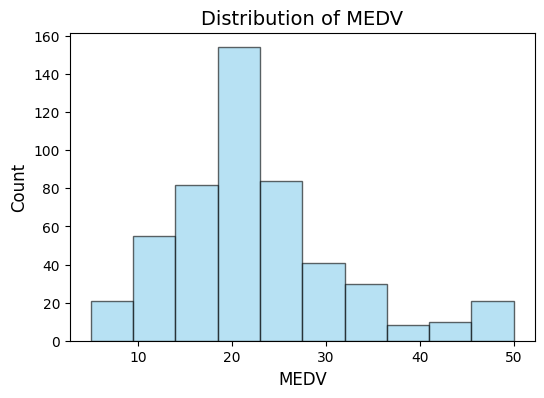

In [11]:
plt.subplots (figsize = (6,4))
plt.hist(housing_df['MEDV'], color = 'skyblue', edgecolor = 'black', alpha=  0.6)
plt.xlabel ('MEDV',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title ('Distribution of MEDV', fontsize = 14)
plt.show()

## BoxPlot

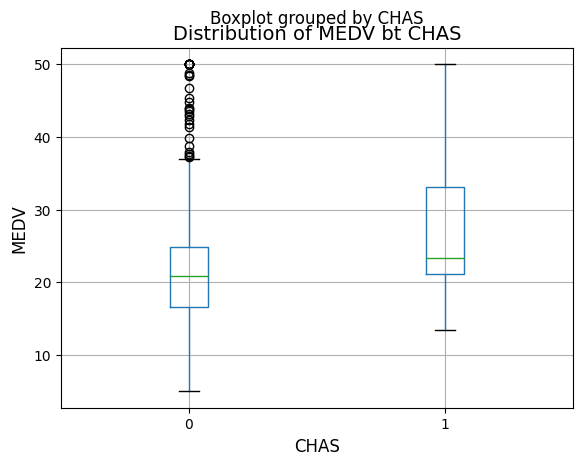

In [12]:

housing_df.boxplot( column = 'MEDV', by ='CHAS', grid = True)
plt.xlabel ('CHAS',fontsize = 12)
plt.ylabel('MEDV', fontsize = 12)
plt.title ('Distribution of MEDV bt CHAS', fontsize = 14)
plt.show()

BOX plot using seaborn


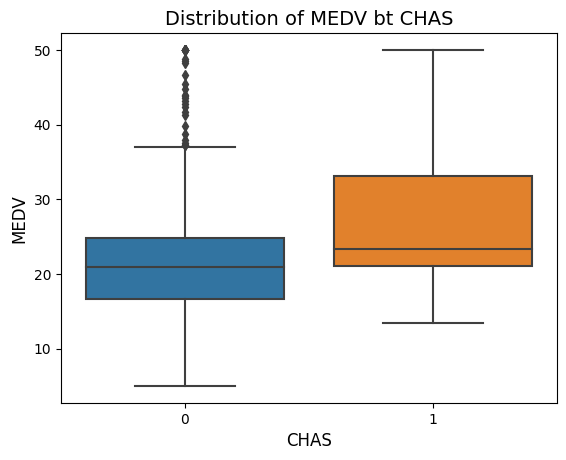

In [13]:
sns.boxplot(x= "CHAS", y = 'MEDV', data = housing_df)
plt.xlabel('CHAS',fontsize = 12)
plt.ylabel('MEDV', fontsize = 12)
plt.title('Distribution of MEDV bt CHAS', fontsize = 14)
plt.show()

side by side boxplot

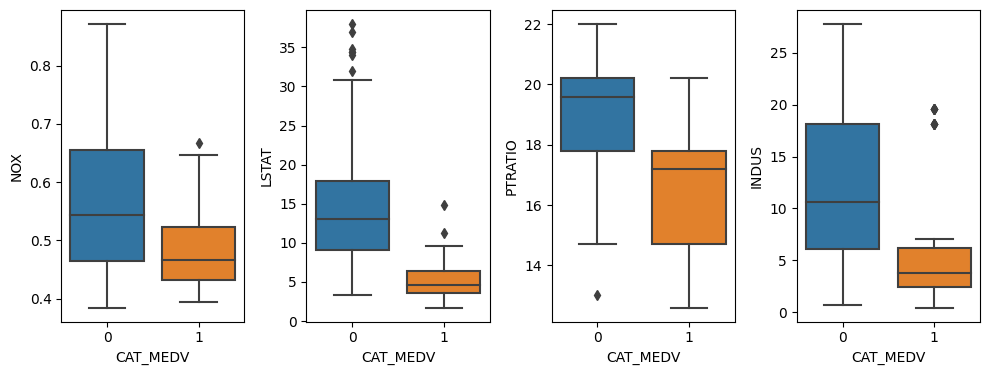

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize =(10,4))
sns.boxplot (x= 'CAT_MEDV', y ='NOX', data = housing_df, ax= axes[0])
sns.boxplot (x= 'CAT_MEDV', y ='LSTAT', data = housing_df, ax= axes[1])
sns.boxplot (x= 'CAT_MEDV', y ='PTRATIO', data = housing_df, ax= axes[2])
sns.boxplot (x= 'CAT_MEDV', y ='INDUS', data = housing_df, ax= axes[3])

for ax in axes:
  ax.set_xlabel('CAT_MEDV')
  plt.suptitle('')
  plt.tight_layout()

## Heat Map

#### Simple Heat Maps for correlation plot

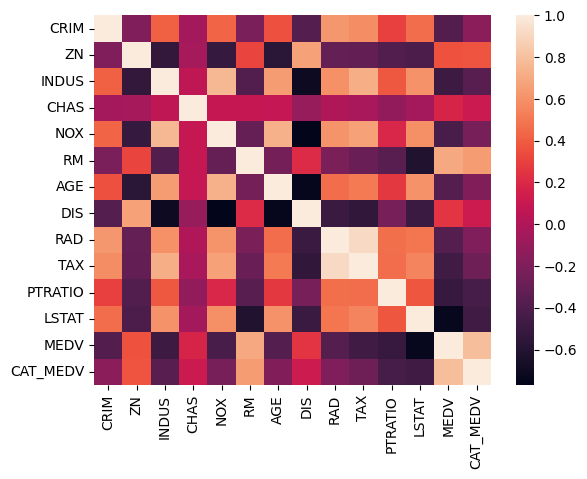

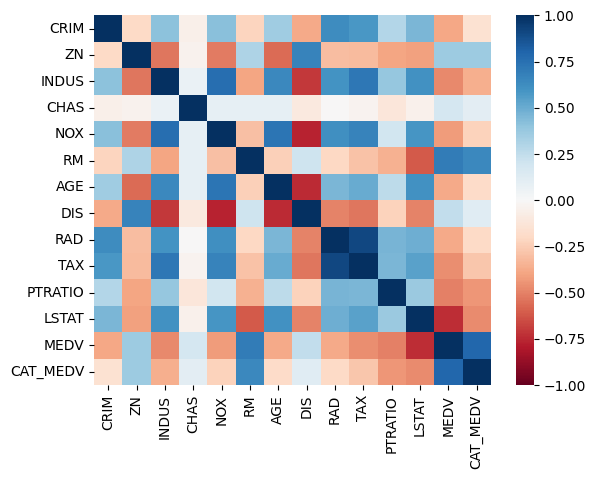

In [19]:
corr = housing_df.corr()
corr
sns.heatmap(corr)
plt.show()
# change the color map to a divergent scale and fix the range of the colormap

sns.heatmap(corr, vmin = -1, vmax = 1, cmap ='RdBu')
plt.show()

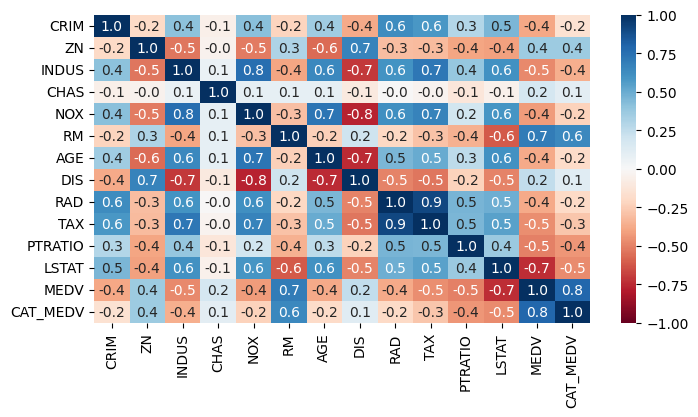

In [22]:
# include information about values

fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(corr,annot = True, fmt = "0.1f", cmap = 'RdBu', center = 0, ax= ax, vmin = -1, vmax = 1)
plt.show()

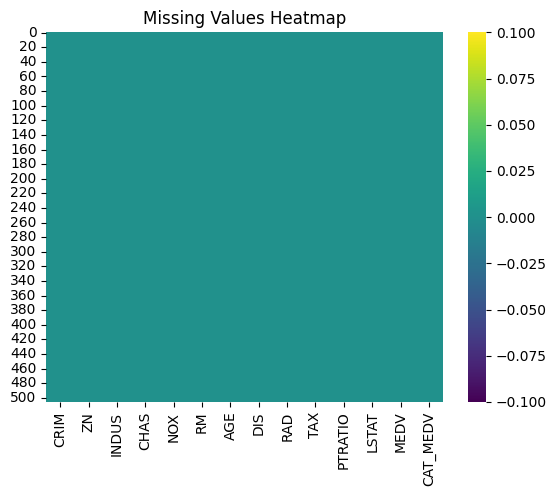

In [26]:
# Use Heatmap for Missing Values

missing_values = housing_df.isnull()
sns.heatmap(missing_values, cmap = 'viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [29]:
df = pd.read_csv("/content/drive/MyDrive/datamining/NYPD_Motor_Vehicle_Collisions_1000.csv")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,Unspecified,NaN,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,Unspecified,NaN,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN


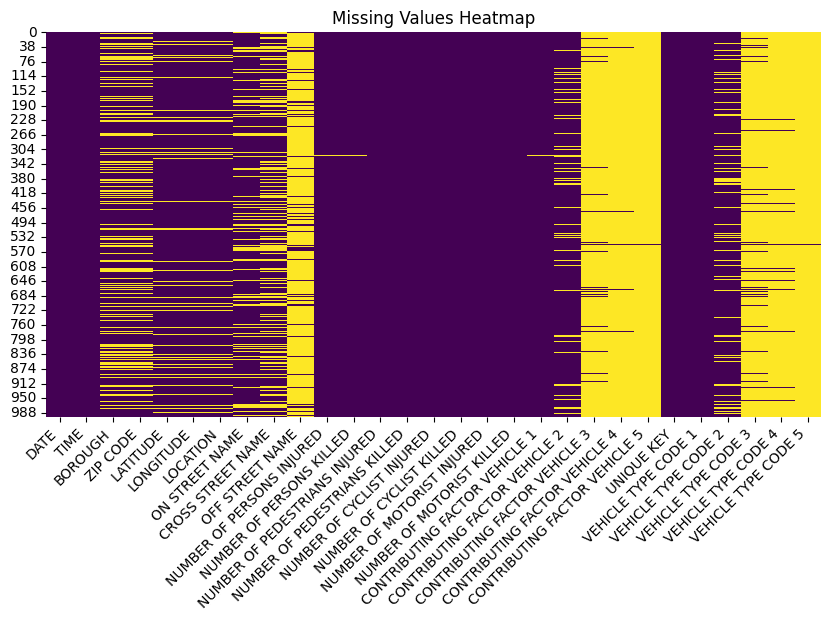

In [35]:
missing_values = df.isnull()
plt.figure(figsize = (10,5))
ax =sns.heatmap(missing_values, cmap = 'viridis', cbar = False)
ax.set_xticklabels(df.columns, rotation = 45, ha ='right')
plt.title("Missing Values Heatmap")
plt.show()

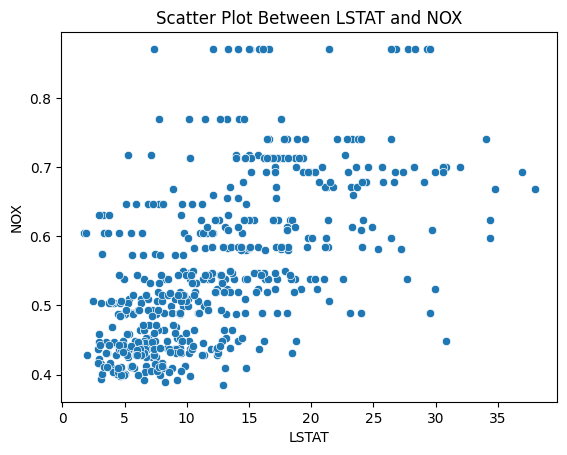

In [37]:
# Scatter Plot for Two Numerical Predictors
sns.scatterplot(data = housing_df, x = 'LSTAT', y = 'NOX')
plt.title ('Scatter Plot Between LSTAT and NOX')
plt.show()

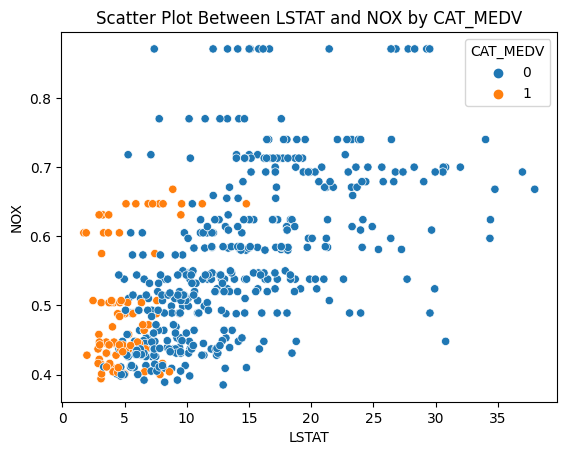

In [38]:
# Scatter Plot for Two Numerical Predictors with hue (CAT_MEDV)
sns.scatterplot(data = housing_df, x = 'LSTAT', y = 'NOX', hue = 'CAT_MEDV')
plt.title ('Scatter Plot Between LSTAT and NOX by CAT_MEDV')
plt.show()

In [39]:
# Plor the Count Plot with me

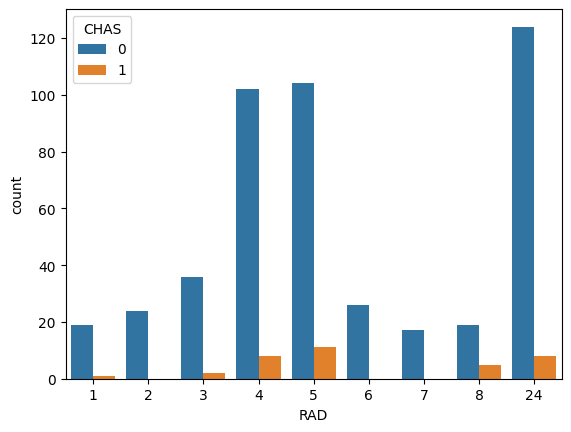

In [42]:
sns.countplot(data = housing_df, x ="RAD", hue ='CHAS')
plt.show()

In [43]:
#Plot the Bar chart

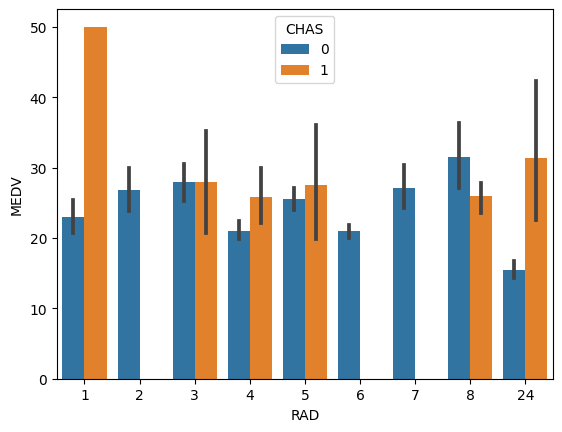

In [45]:
sns.barplot(data = housing_df, x ="RAD", y = "MEDV", hue ="CHAS")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

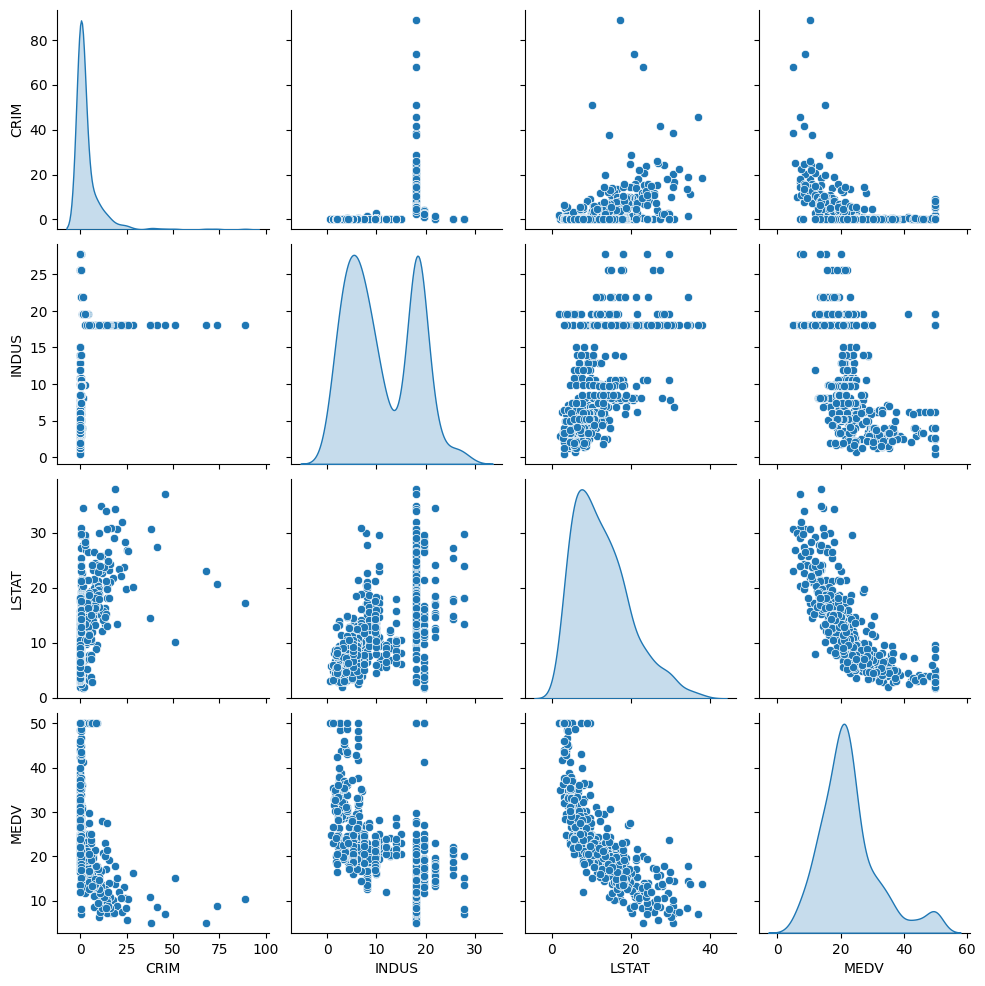

In [48]:
# Scatter Plot of matrix of pairplot
data = housing_df[['CRIM', 'INDUS','LSTAT','MEDV']]
# Create a scatter Plot
sns.pairplot(data, diag_kind ='kde')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

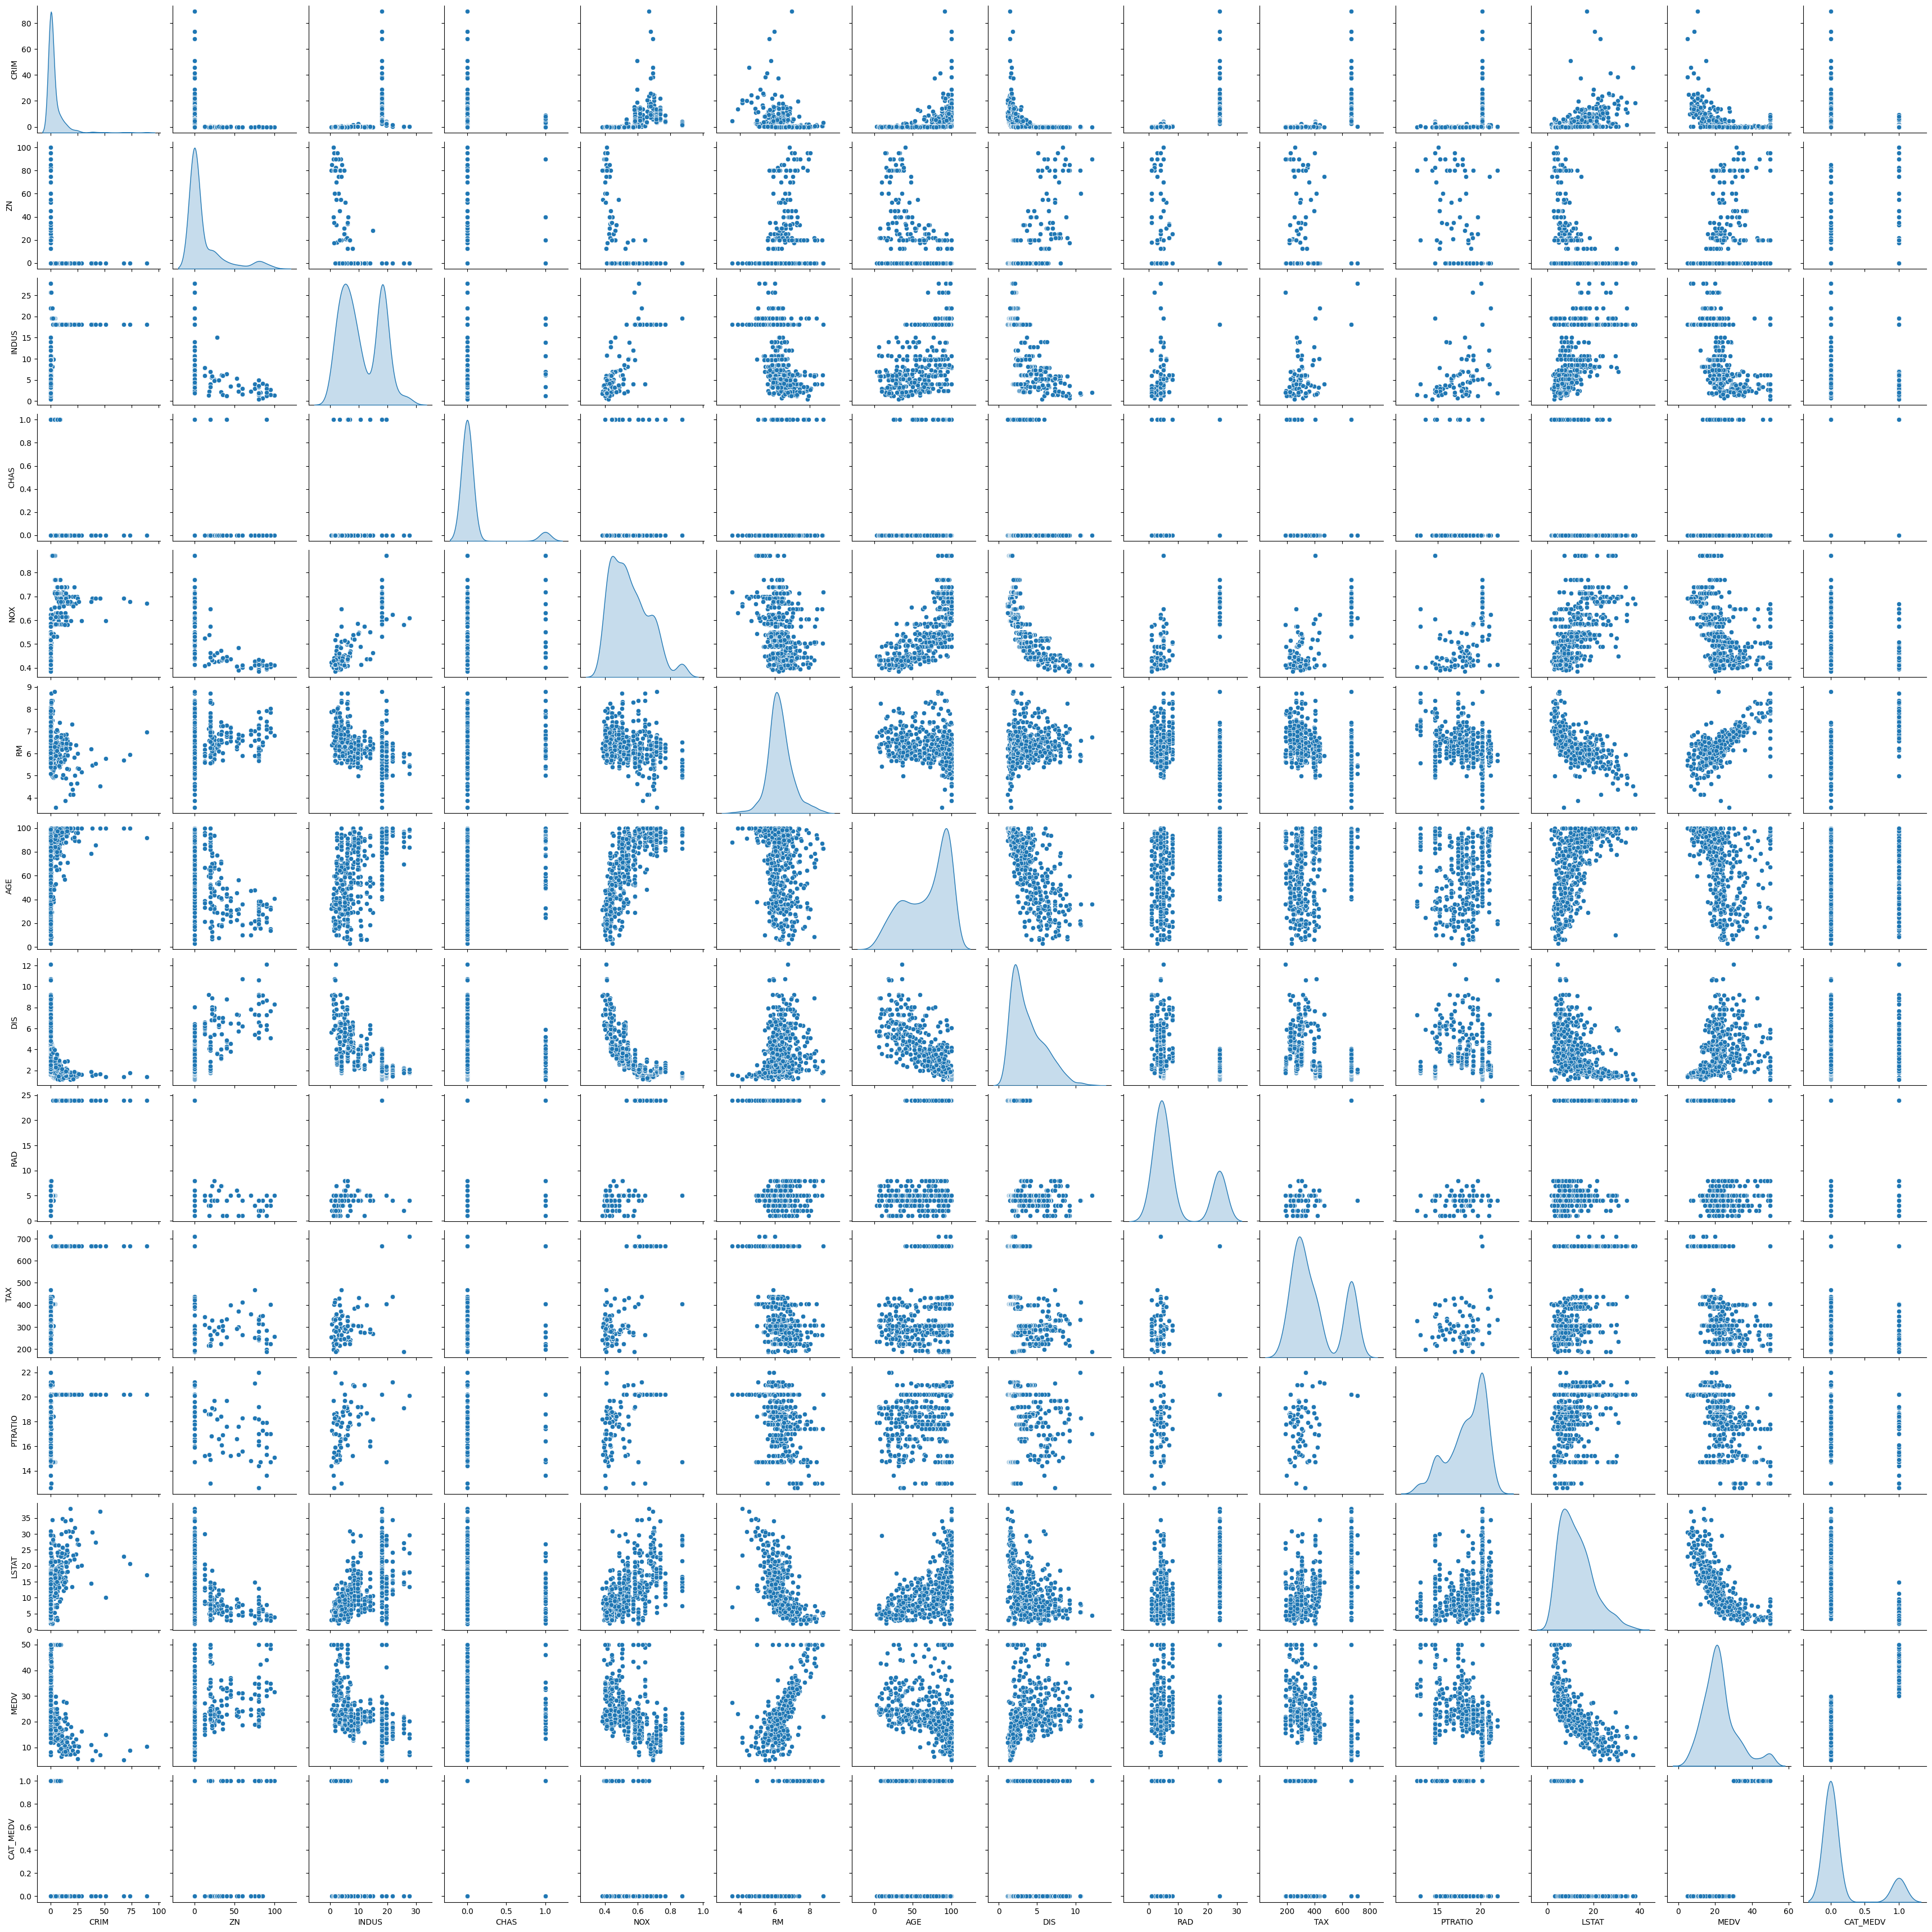

In [49]:
sns.pairplot(housing_df, diag_kind ='kde')
plt.show

Scaling(Axis Scaling)

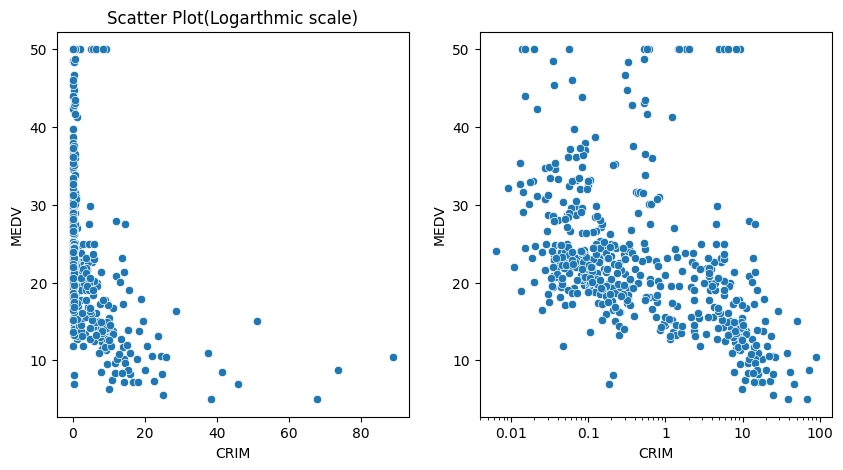

In [54]:
plt.rcParams['axes.formatter.min_exponent' ] = 4

figs, axes = plt.subplots(1,2,figsize = (10,5))
sns.scatterplot(data =housing_df, x ="CRIM", y= "MEDV", ax = axes[0])
axes[0].set_title('Scatter Plot(Simple Axes)')

#Sacter plot with Logarithmic scale on X-axis and Y-axis
sns.scatterplot(data =housing_df, x ="CRIM", y= "MEDV", ax = axes[1])
axes[0].set_title('Scatter Plot(Logarthmic scale)')
axes[1].set_xscale('log')
axes[1].set_xscale('log')

# Aggregration

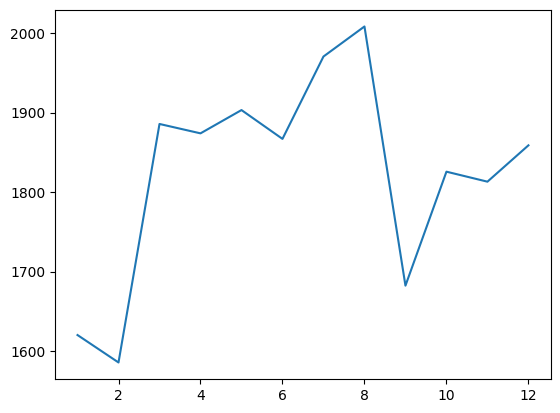

In [59]:
amtrak_df['Month_variable'] = amtrak_df['Date'].dt.month
monthly_avg_ridership = amtrak_df.groupby('Month_variable')['Ridership'].mean()
plt.plot(monthly_avg_ridership.index, monthly_avg_ridership.values)
